## 1. Global Earthquakes
### In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import cmaps
import requests
import cartopy
import cartopy.crs as ccrs                                               
from cartopy.io import shapereader as shpreader
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
Sig_Eqs=pd.read_csv('usgs_earthquakes.csv')
Eqs_index=Sig_Eqs['mag'].sort_values(ascending=False)[0:50].index
Eqs_top50=Sig_Eqs.loc[Eqs_index]
Eqs_top50

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


C:\Users\admin\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:531: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
C:\Users\admin\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:538: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. 

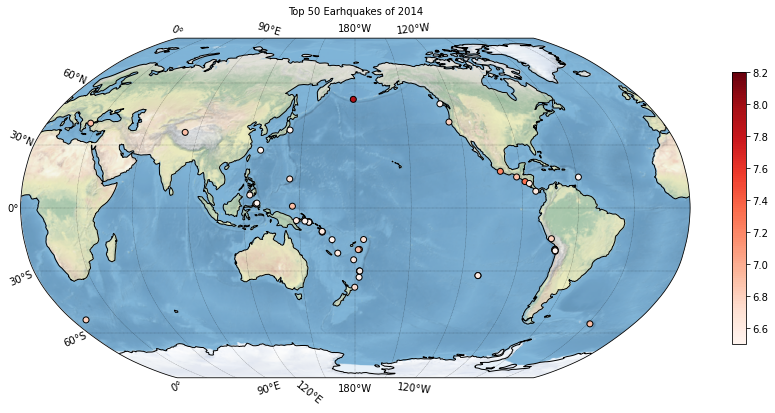

In [3]:
lon = np.array(Eqs_top50.longitude)#转化为数组格式,方便后续处理
lat = np.array(Eqs_top50.latitude)
mag = np.array(Eqs_top50.mag)

fig,ax=plt.subplots(figsize=(15,10),nrows=1,ncols=1,subplot_kw=dict(projection=ccrs.Robinson(180)))#
gl=ax.gridlines(draw_labels=True,linestyle=":",linewidth=0.3,color='k')#绘制网格线
gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                        
gl.xlocator=mticker.FixedLocator(np.arange(-180,180,30))      
gl.ylocator=mticker.FixedLocator(np.arange(-90,90,30)) 
ax.set_global()
ax.stock_img()#加地图
ax.coastlines()#加海岸线
ax.set_title('Top 50 Earhquakes of 2014',fontsize =10)#设置标题
geodetic = ccrs.Geodetic()
robinson = ccrs.Robinson()
for i in range(50):
    lon[i],lat[i]=robinson.transform_point(lon[i],lat[i],geodetic)#将经纬度坐标转变为当前投影方式下
cd1 =plt.scatter(lon,lat,c= mag,edgecolors='k',cmap=cmaps.MPL_Reds,transform =ccrs.Robinson())   
fig.colorbar(cd1, shrink=0.5,ax=ax)
plt.grid(False)
plt.show()

## 2. Explore a netCDF dataset
### 2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [4]:
#地面两米的空气温度
ds = xr.open_dataset('air.2m.mon.mean.nc')

In [5]:
T=ds.air.isel(time=-1)

C:\Users\admin\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\admin\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\admin\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\admin\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyD

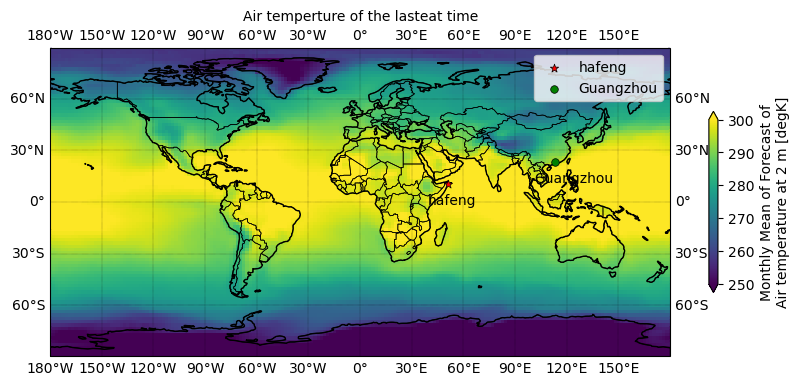

In [6]:
# 给两个地点的坐标
hafeng = dict(lon=51.24, lat=10.27)#哈丰角51°24'E，10°27'N
Guangzhou = dict(lon=113.25, lat=23.13)
lons = [hafeng['lon'], Guangzhou['lon']]
lats = [hafeng['lat'], Guangzhou['lat']]

# 创建画布
plt.figure(figsize=(10,6), dpi=100)

# 1.创建ax用。。。投影
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)

# 画出地面两米的温度
T.plot(ax=ax, x='lon',y='lat',robust=True,transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})
#绘制网格线
gl=ax.gridlines(draw_labels=True,linestyle=":",linewidth=0.3,color='k')
#ticks and lables
gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                        
gl.xlocator=mticker.FixedLocator(np.arange(-180,180,30))      
gl.ylocator=mticker.FixedLocator(np.arange(-90,90,30)) 
ax.set_xlabel('Month') #为子图设置横轴标题
ax.set_ylabel('Year') #为子图设置纵轴标题
plt.xlabel('X Axis') #设置x轴名称 ax1.set_xlabel
plt.ylabel('Y Axis') #设置Y轴名称 ax1.set_ylabel
#设置标题
ax.set_title('Air temperture of the lasteat time',fontsize =10)

# 画国界线 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
# 画海岸线
ax.coastlines(resolution='110m')

#添加文本
ax.text(hafeng['lon'] -12 , hafeng['lat'] - 12, 'hafeng',
         horizontalalignment='left',
         transform=ccrs.Geodetic())
ax.text(Guangzhou['lon'] -12 , Guangzhou['lat'] - 12, 'Guangzhou',
         horizontalalignment='left',
         transform=ccrs.Geodetic())
# 添加两个点
ax.scatter(hafeng['lon'],hafeng['lat'],s=40,c='r',marker='*',label='hafeng',edgecolors='k', linewidths=0.5)
ax.scatter(Guangzhou['lon'],Guangzhou['lat'],s=30,c='green',marker='o',label='Guangzhou',edgecolors='k', linewidths=0.5)
plt.legend()
plt.show()

### 2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

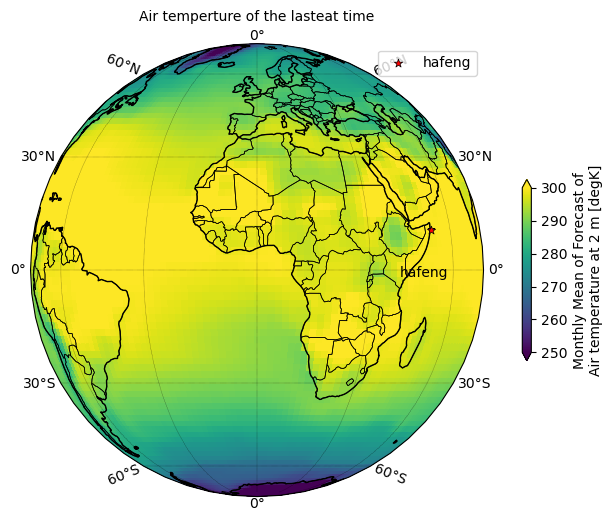

In [7]:
# 给两个地点的坐标
hafeng = dict(lon=51.24, lat=10.27)#哈丰角51°24'E，10°27'N
Guangzhou = dict(lon=113.25, lat=23.13)
lons = [hafeng['lon'], Guangzhou['lon']]
lats = [hafeng['lat'], Guangzhou['lat']]

# 创建画布
plt.figure(figsize=(10,6), dpi=100)

# 1.创建ax用。。。投影
proj = ccrs.Orthographic() 
ax = plt.axes(projection=proj)
# 画出地面两米的温度
T.plot(ax=ax, x='lon',y='lat',robust=True,transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})

#绘制网格线
gl=ax.gridlines(draw_labels=True,linestyle=":",linewidth=0.3,color='k')

#ticks and lables
gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                        
gl.xlocator=mticker.FixedLocator(np.arange(-180,180,30))      
gl.ylocator=mticker.FixedLocator(np.arange(-90,90,30)) 
ax.set_xlabel('Month') #为子图设置横轴标题
ax.set_ylabel('Year') #为子图设置纵轴标题

#设置标题
ax.set_title('Air temperture of the lasteat time',fontsize =10)

# 画国界线 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
# 画海岸线
ax.coastlines(resolution='110m')

#添加文本
ax.text(hafeng['lon'] -12 , hafeng['lat'] - 12, 'hafeng',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

# 添加两个点
ax.scatter(hafeng['lon'],hafeng['lat'],s=40,c='r',marker='*',label='hafeng',edgecolors='k', linewidths=0.5,transform=ccrs.PlateCarree())
plt.legend()
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:543: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for inter in intersection:


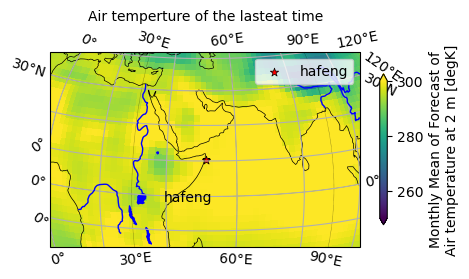

In [8]:
plt.figure(figsize=(5,5), dpi=100)
central_lon, central_lat = 51.24, 10.27 # hafeng
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)

extent = [central_lon-50, central_lon+50, central_lat-20, central_lat+20]
ax.set_extent(extent)

ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)

T.plot(ax=ax, x='lon',y='lat',robust=True,transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})

#绘制网格线
gl=ax.gridlines(draw_labels=True,linestyle=":",linewidth=0.3,color='k')
#设置标题
ax.set_title('Air temperture of the lasteat time',fontsize =10)
#ticks and lables
gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                        
gl.xlocator=mticker.FixedLocator(np.arange(-180,180,30))      
gl.ylocator=mticker.FixedLocator(np.arange(-90,90,30)) 

# Add features to axes using methods
ax.coastlines(resolution='110m', linewidth=0.5)
ax.gridlines()

#添加文本
ax.text(hafeng['lon'] -12 , hafeng['lat'] - 12, 'hafeng',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

# 添加两个点
ax.scatter(hafeng['lon'],hafeng['lat'],s=40,c='r',marker='*',label='hafeng',edgecolors='k', linewidths=0.5,transform=ccrs.PlateCarree())
plt.legend()
plt.show()